# Task 2 : EDA on Titanic Survivors Dataset

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv(r"E:\datasets\titanic\train.csv")

Getting to know dataset features : 

In [3]:
df.shape

(891, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.isnull().sum()  #checking for null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Here we can see that there are missing values in the 'Age','Cabin' and 'Embarked' column. In order to perform further analysis, it is required to get rid of the missing values.

Now, since there are 80 percent of null values in the 'Cabin' column, we will have to drop that column. 
As for the 'Age' column, we will replace the missing values with the mean of the other values in that column.
For the 'Embarked' column, we shall find which is the most frequent value in that column and replace the missing values with the same.

In [8]:
#dropping the 'Cabin' column
df.drop(columns = ['Cabin'], inplace = True)

In [9]:
#replacing the missing values in 'Age' with the mean values 
df['Age'].fillna(df['Age'].mean(), inplace = True)

In [10]:
#finding the frequency of occurences in the 'Embarked' column
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [11]:
#replacing the missing values in 'Embarked' with the most frequent value i.e 'S' 
df['Embarked'].fillna('S', inplace = True)

In [12]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Dropping Unnecessary columns : 

In [13]:
df.drop(columns=['PassengerId','Name','Ticket'],inplace = True)

Converting datatypes to further simplify model training : 

In [14]:
df['Age'] = df['Age'].astype('int64')
df['Survived'] = df['Survived'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')
df['Sex'] = df['Sex'].astype('category')
df['Fare'] = df['Fare'].astype('int64')
df['Embarked'] = df['Embarked'].astype('category')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Sex       891 non-null    category
 3   Age       891 non-null    int64   
 4   SibSp     891 non-null    int64   
 5   Parch     891 non-null    int64   
 6   Fare      891 non-null    int64   
 7   Embarked  891 non-null    category
dtypes: category(4), int64(4)
memory usage: 32.0 KB


In [16]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22,1,0,7,S
1,1,1,female,38,1,0,71,C
2,1,3,female,26,0,0,7,S
3,1,1,female,35,1,0,53,S
4,0,3,male,35,0,0,8,S


There are no missing values now. We shall proceed with the further analysis

# Univariate Analysis

In [17]:
df['Sex'].value_counts()    #Number of males and females on-board

Sex
male      577
female    314
Name: count, dtype: int64

In [18]:
df['Survived'].value_counts() #Number of people survived 

Survived
0    549
1    342
Name: count, dtype: int64

In [19]:
df['Age'].describe()

count    891.000000
mean      29.544332
std       13.013778
min        0.000000
25%       22.000000
50%       29.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

Average Age of Passenger : 29    
Minimum Age : 0   
Maximum Age : 80

In [20]:
afp = df.groupby('Pclass')['Fare'].mean()
afp.round(2)

Pclass
1    83.75
2    20.46
3    13.17
Name: Fare, dtype: float64

Average Fare per Class : 

 Class 1 : $83.75
 
 Class 2 : $20.46 
 
 Class 3 : $13.17

In [21]:
sdf = df.groupby('Sex')['Pclass'].value_counts()
sdf

Sex     Pclass
female  3         144
        1          94
        2          76
male    3         347
        1         122
        2         108
Name: count, dtype: int64

Number of males and females per class :

Males : 
Class 1 : 122 | Class 2 : 108 | Class 3 : 347

Females :
Class 1 : 94 | Class 2 : 76 | Class 3 : 144

# Multivariate Analysis 

In [22]:
pd.crosstab(df['Pclass'],df['Sex'])

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


<Axes: xlabel='Pclass', ylabel='count'>

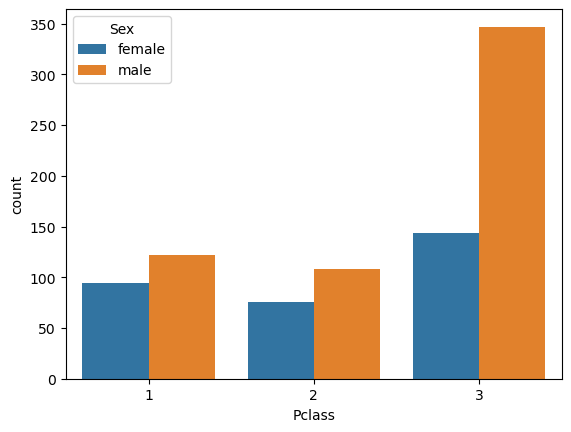

In [23]:
sns.countplot(data = df, x = 'Pclass', hue = 'Sex')

In [24]:
pd.crosstab(df['Pclass'],df['Survived']) #<-class wise survival males females

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


<Axes: xlabel='Pclass', ylabel='count'>

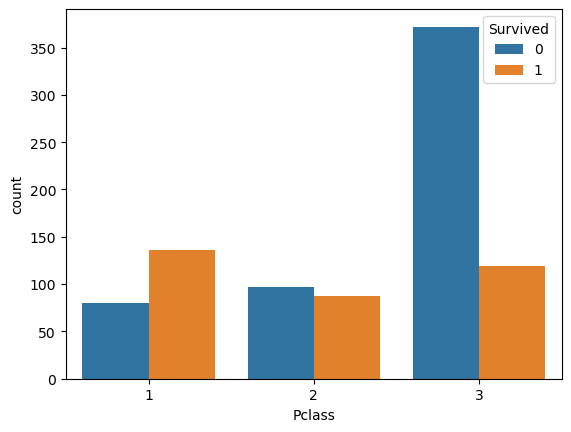

In [25]:
sns.countplot(data = df, x = 'Pclass', hue = 'Survived')

In [26]:
pd.crosstab(df['Sex'],df['Survived']) 

Survived,0,1
Sex,,
female,81,233
male,468,109


<Axes: xlabel='Sex', ylabel='count'>

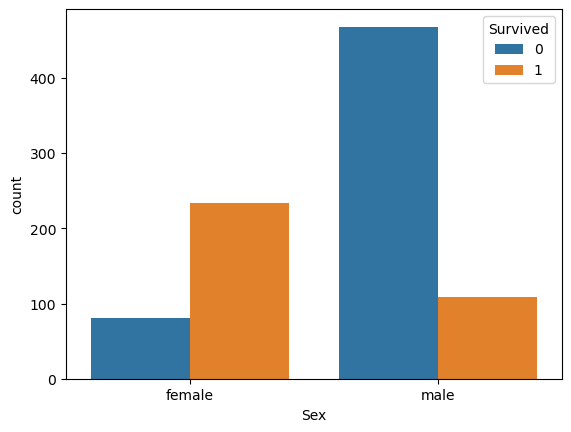

In [27]:
sns.countplot(data = df, x = 'Sex', hue = 'Survived')

In [28]:
pd.crosstab(df['Embarked'],df['Survived'])

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,219


<Axes: xlabel='Embarked', ylabel='count'>

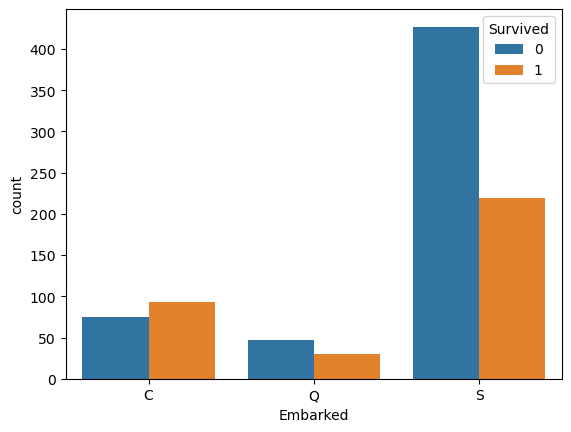

In [29]:
sns.countplot(data = df, x = 'Embarked', hue = 'Survived')

keep this.